In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

attrition = pd.read_csv("employee_attrition.csv")
print(attrition.info())
print(attrition.head())
print(attrition.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset Link:

https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors?select=HR_Analytics.csv.csv


Initial Thoughts on this Dataset:
- The dataset provides information on employee attrition and what are the factors that contribute to the attrition of the employee.
- The dataset consists of 9 categorical attributes and 26 numerical attributes.
- The target variable is 'Attrition' and need to check how various independent attributes affect this dependent attribute.
- Key variables for predicting attrition are 'Job satisfaction, Monthly income, Work life balance, distance from home' 
- Pay values such as Monthly rate, Daily rate and Hourly rate combined factor will be crucial for deciding the predictor variable.

In [111]:
categorical_attributes = attrition.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_attributes = attrition.select_dtypes(include=['number']).columns.tolist()
print(categorical_attributes)
print(numerical_attributes)
print(len(categorical_attributes))
print(len(numerical_attributes))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
9
26


Insights that can be extracted from the dataset:
- How the job satisfaction impact in deciding the attrition of an employee and what are the factors that contribute for lower job satisfaction
- The work life balance culture followed in the particular organisation plays a crucial role in the employer satisfaction
- Monthly income which decides the employee to stay in the same company because he needs to manage his expenses and also he'll strive to get the income for which he's working.
- Years at the company will also be a deciding factor, in some cases the employer loves the company and stays with the same company and in some other cases the employer doesn't like the same repetitive work that he's doing so he may decide to leave.
- Distance from home is also a major factor because most employees prefer staying with the family.

Hypothesis from the dataset:
- Hypothesis 1: Employees who work more hours apart from the normal working hours(overtime) are on the verge of leaving the company.
- Hypothesis 2: Employers with a low monthly income are more likely to leave the company.
- Hypothesis 3: Employers whose homes is far from the workplace are more likely to leave in search of opportunities in their hometown.
- Hypothesis 4: Employers who frequently travel for business meetings are more likely to leave the organization.
- Hypothesis 5: Employers with low performance ratings may leave the organization by themselves or the company will lay off them.
- Hypothesis 6: Employers without any promotions for a long time may leave the organization for better growth and financial opportunities.
- Hypothesis 7: Employers with low job satisfaction are the ones who are more likely to leave the organization.
- Hypothesis 8: Employers with low percent of salary hike are on the verge of leaving the company.
- Hypothesis 9: Employers who are married on the verge of leaving the company to earn more due to increased responsibilites.
- Hypothesis 10: Employers who are not working in their desired working role are more likely to leave the company

Text(0, 0.5, 'Attrition')

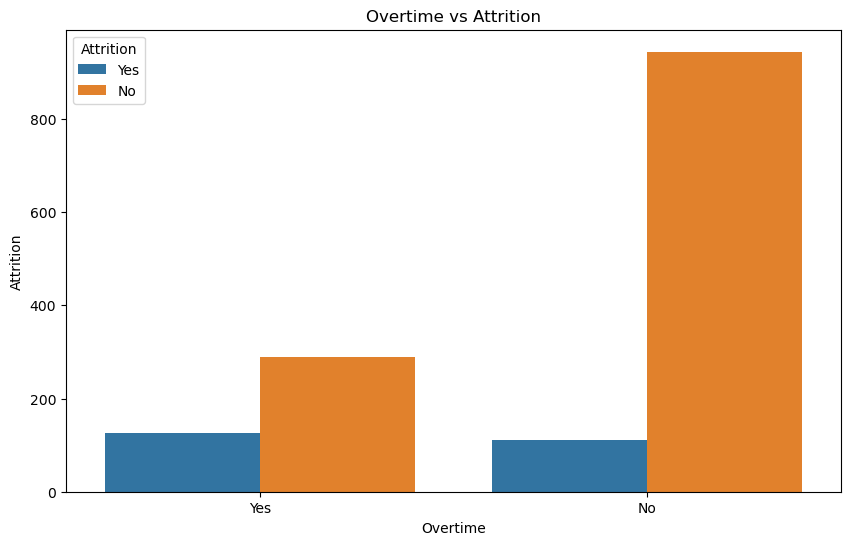

In [114]:
#Hypothesis 1
plt.figure(figsize=(10,6))
sns.countplot(data=attrition, x='OverTime', hue='Attrition')
plt.title('Overtime vs Attrition')
plt.xlabel('Overtime')
plt.ylabel('Attrition')

This plot shows that, the employees who work overtime and who are willing to leave is low compared to the people who are not working overtime.
So, hypothesis 1 is false and this factor 'overtime' is not contributing much in deciding the predictor variable 'Attrition'

Text(0, 0.5, 'Monthly Income')

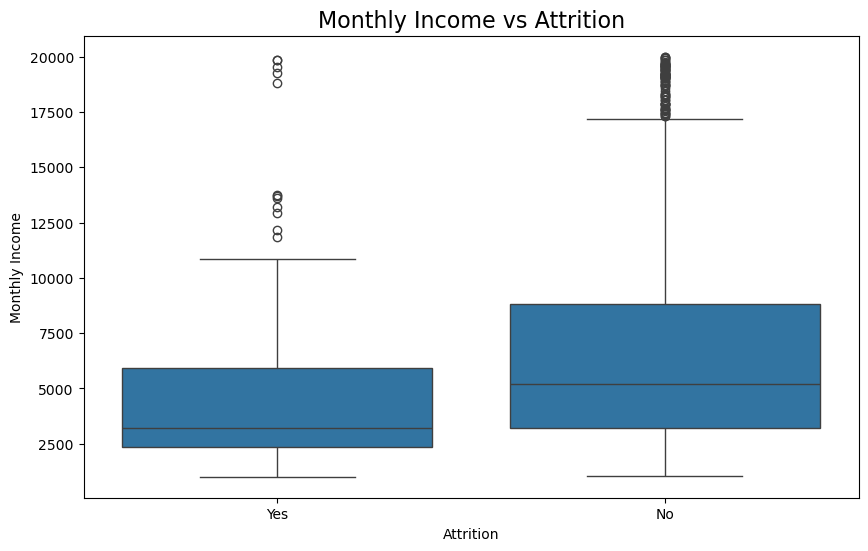

In [116]:
#Hypothesis 2
plt.figure(figsize=(10,6))
sns.boxplot(data=attrition, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition', fontsize=16)
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

This plot clearly shows that the employees who are earning a very low monthly income are in the verge of leaving the company and those who are earning a satisfactory amount as monthly income are not leaving the present organization. So, here the Hypothesis 2 is True.

Text(0, 0.5, 'Distance from Home ( in miles)')

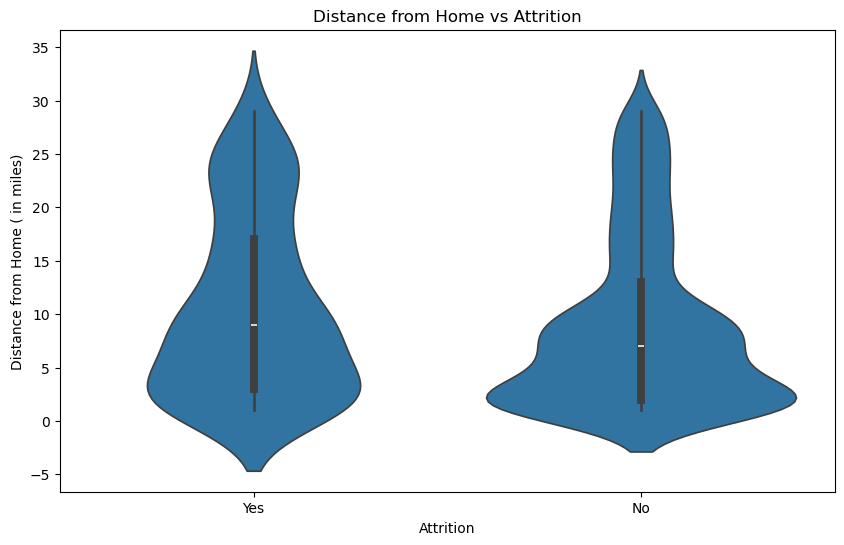

In [118]:
#Hypothesis 3
plt.figure(figsize=(10,6))
sns.violinplot(data=attrition, x='Attrition', y='DistanceFromHome')
plt.title('Distance from Home vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home ( in miles)')

This plot shows that the employees who are living far away from their home are in the verge of quitting their present company. And even some other people who are working near their home town are also quitting for some other reasons. So this factor, is not a sole determinant of the predictor 'attrition'. So, my hypothesis 3 is partially true.

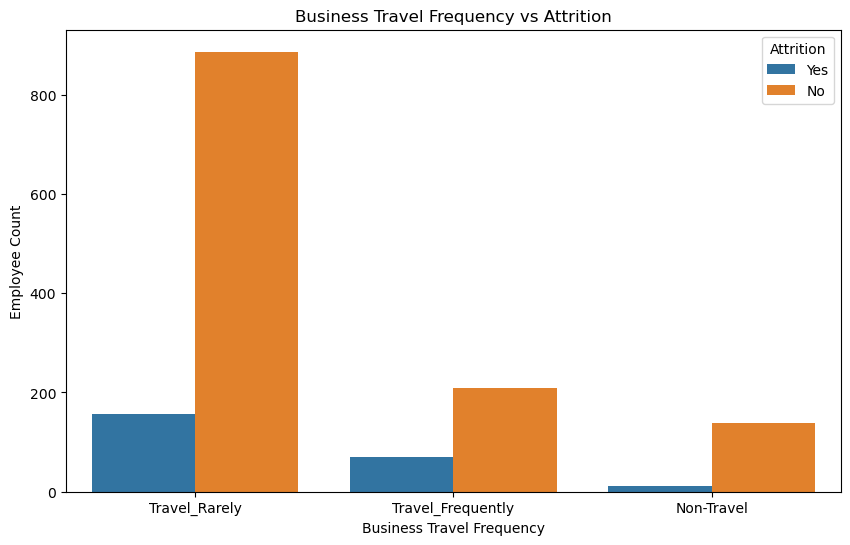

In [120]:
#Hypothesis 4
plt.figure(figsize=(10,6))
sns.countplot(data=attrition, x='BusinessTravel', hue='Attrition')
plt.title('Business Travel Frequency vs Attrition')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Employee Count')
plt.legend(title='Attrition', loc='upper right')


This graph clearly shows that, the people who are travelling for business travel rarely and frequently are in the verge of leaving the company. But most of the people who are travelling rarely for business travels stay with the same company. So, Business travel is also not a sole determinant of 'Attrition'. So, the hypothesis 4 is also partially true. 

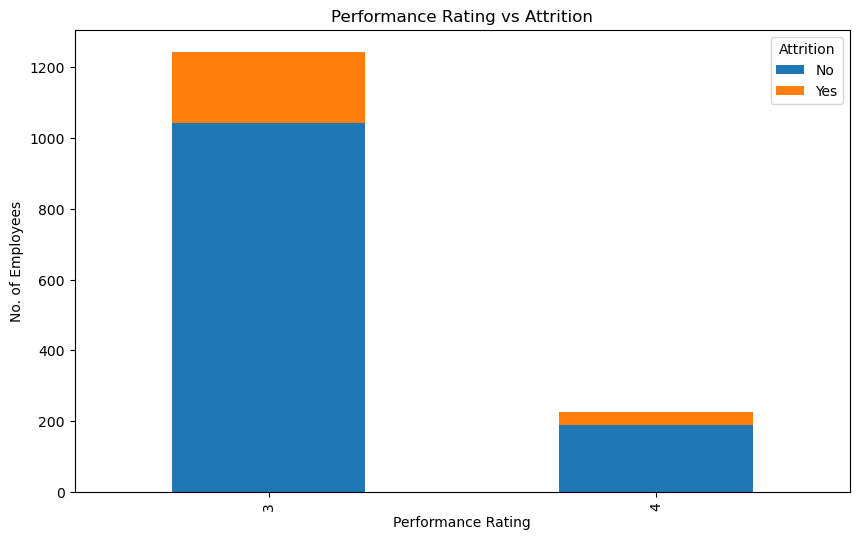

In [122]:
#Hypothesis 5
performance_attrition = attrition.groupby(['PerformanceRating', 'Attrition']).size().unstack()
performance_attrition.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Performance Rating vs Attrition')
plt.xlabel('Performance Rating')
plt.ylabel('No. of Employees')
plt.legend(title='Attrition', loc='upper right')

The lowest performance rating in this dataset is 3. Most of the employees with a low rating stays within that company and a noticeable portion only leaves the company. So, the hypothesis 5 is False and "performance rating' is not a contributor for deciding the predictor 'Attrition'.

Text(0, 0.5, 'Years Since Last Promotion')

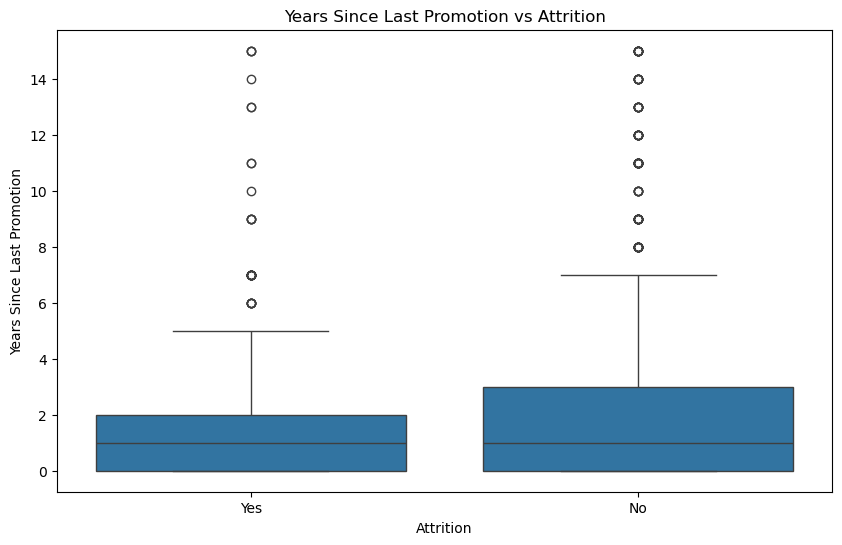

In [124]:
#Hypothesis 6
plt.figure(figsize=(10, 6))
sns.boxplot(data=attrition, x='Attrition', y='YearsSinceLastPromotion')
plt.title('Years Since Last Promotion vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')



With this plot, it is clearly seen that the average year since last promotion is just 2 years in most of the cases. And the employees who are leaving because of this factor 'YearsSinceLastPromotion' is also less and most of the people are staying with the same company. So, the hypotheis 6 is false and 'YearsSinceLastPromotion' is not a deciding factor for arriving at the target variable.

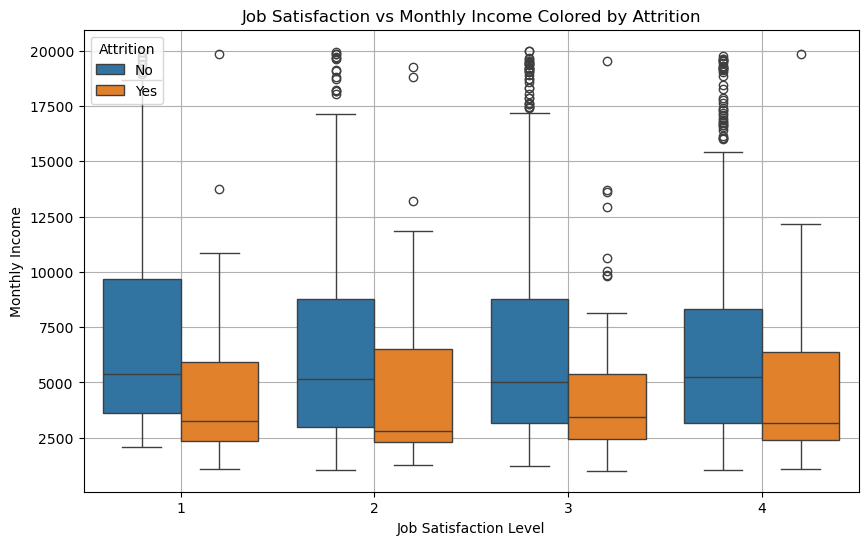

In [126]:
#Hypothesis 7
plt.figure(figsize=(10, 6))
sns.boxplot(data=attrition, x='JobSatisfaction', y='MonthlyIncome', hue='Attrition')
plt.title('Job Satisfaction vs Monthly Income Colored by Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition', loc='upper left')
plt.grid()


Here, from these plots it's clearly visible that people who are having the high job satisfaction level and a good monthly pay, are tend to leave that company. It's the opposite of what my assumption states. So, Hypothesis 7 is false and 'JobSatisfaction' is not a deciding factor for 'attrition'.

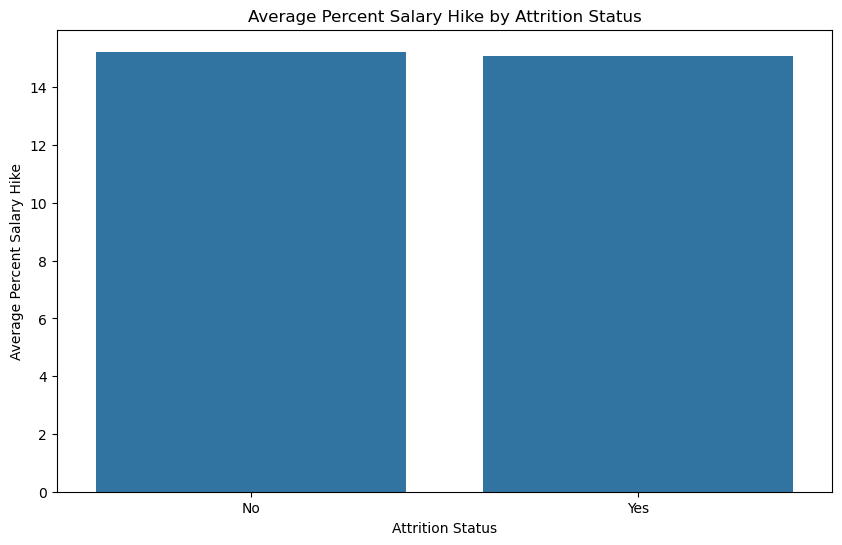

In [128]:
#Hypothesis 8
Salary_hike = attrition.groupby('Attrition')['PercentSalaryHike'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='PercentSalaryHike', data=Salary_hike)
plt.title('Average Percent Salary Hike by Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Average Percent Salary Hike')
plt.show()

Here, this plot shows that people who receive and do not receive a salary hike, contribute to both attrition and staying with the same company. So Average percent salary hike didn't arrive at any relationship with attrition. So, Hypothesis 8 is False.

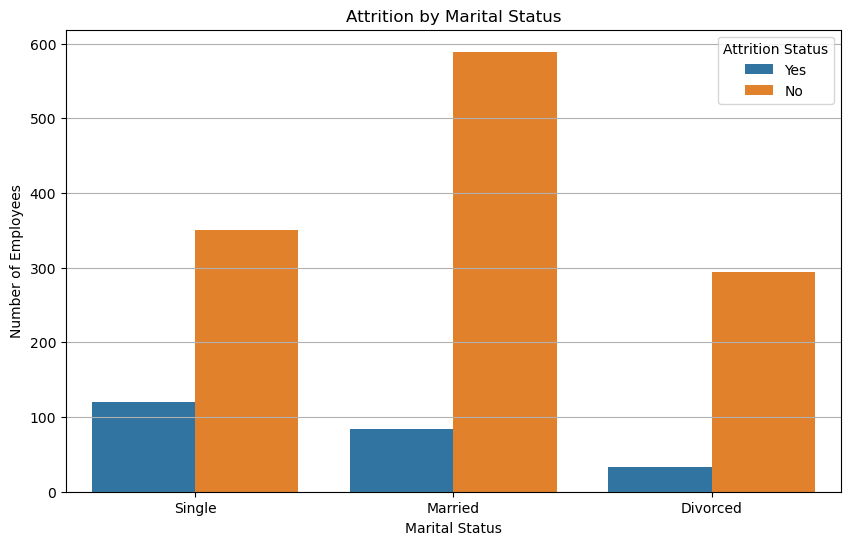

In [143]:
# Hypothesis 9
plt.figure(figsize=(10, 6))
sns.countplot(data=attrition, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition Status')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


Here, this plot shows that people even after married they are not in the plan of switching their company and wish to stay with the same organization.
So, here the Hypothesis 9 is false and marritial status attribute wasn't contributed in arriving the attrition status.

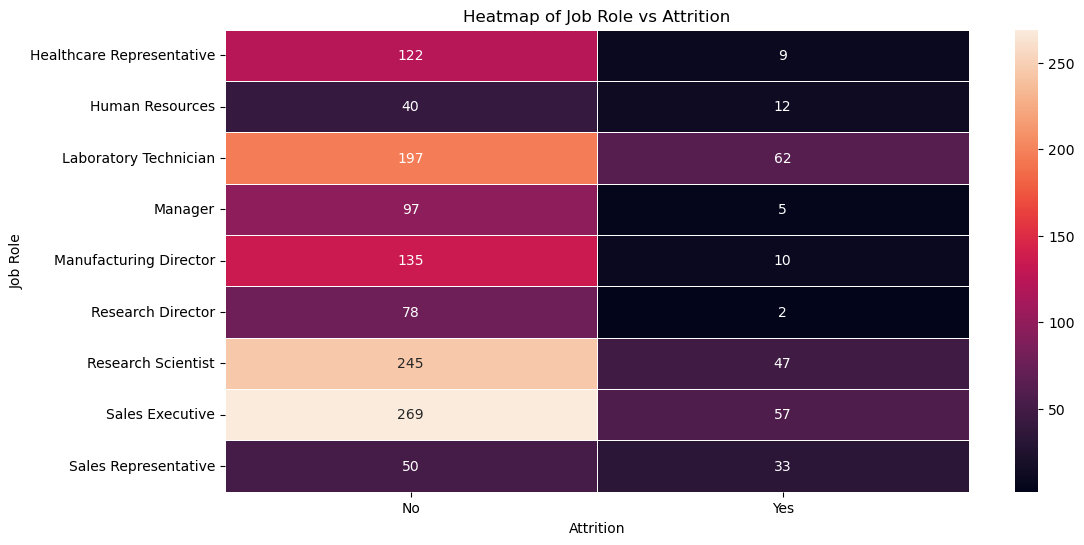

In [150]:
#Hypothesis 10
jobswitch = pd.crosstab(attrition['JobRole'], attrition['Attrition'])
plt.figure(figsize=(12, 6))
sns.heatmap(jobswitch, annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Job Role vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Role')
plt.show()

This Heatmap clearly shows that people who are doing job role switch is very low and most of the people are staying in the same job role. So desired working role has no use in determining the 'employee attrition'. So, here the Hypothesis 10 is False.